# PyTorch Workflow

Let's explore an example PyTorch end-to-end workflow.

In [ ]:
what_we_are_covering = {
    1: "data (prepare and load)",
    2: "build the model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading the model",
    6: "putting it all together"
}

what_we_are_covering

{1: 'data (prepare and load)',
 2: 'build the model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading the model',
 6: 'putting it all together'}

In [ ]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'1.13.1+cu116'

## 1. Data (preparing and loading)

Data can be almost anything... in machine learning.

- Excel spreadsheet
- Images of any kind
- Videos (YouTube has a lot of data...)
- Audio like songs or podcasts
- DNA
- Text

Machine learning is a game of two parts:
1. Get data into a numerical representation
1. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some *known* data using the linear regression formula.

We'll use a linear regression formula to make a straight line with *known* **parameters**.

In [ ]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create some data
start = 0
end = 5
step = 0.05
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0500],
         [0.1000],
         [0.1500],
         [0.2000],
         [0.2500],
         [0.3000],
         [0.3500],
         [0.4000],
         [0.4500]]), tensor([[0.3000],
         [0.3350],
         [0.3700],
         [0.4050],
         [0.4400],
         [0.4750],
         [0.5100],
         [0.5450],
         [0.5800],
         [0.6150]]))

In [ ]:
len(X), len(y)

(100, 100)

### Splitting data into training and test set (one of the most important concept in ml in general)

Let's create a training and test set with our data.



In [ ]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

How might we better visualize our data?

This is where the data explorer's motto comes in!  
**"Visualize, visualize, visualize!"**

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")  
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Test data")  
  
  # Are there predictions
  if predictions is not None:
    # Plot the predictions
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

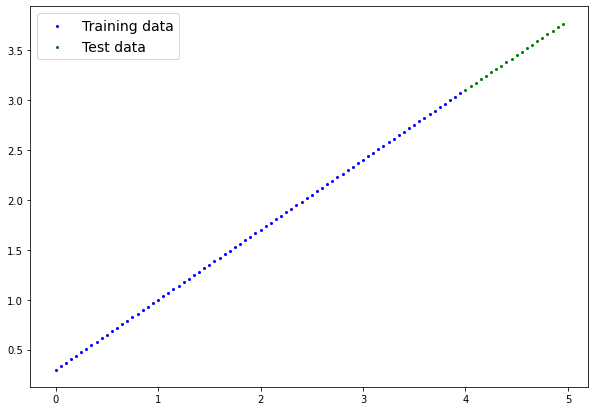

In [ ]:
plot_predictions()

## 2. Build model

Our first PyTorch model!

This is very exciting... let's do it!

What our model does:
- Start with random values (weights and bias)
- Look at training data and adjust the random values to better represent the ideal values (the weight and bias values we used to create the data).

How does it do so?

Through two main algorithms:
1. Gradient descent
1. Backpropogation

In [ ]:
# Create linear regression model class
class LinearRegression(nn.Module): # <- almost everything in PyTorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
    
  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is input data
    return self.weights * x + self.bias # The linear regression formula

### PyTorch model building essentials

- `torch.nn` - contains all the building blocks for computational neural networks
- `torch.nn.Parameter` - what parameter should the model try to learn (often a layer from torch.nn will set these for us)
- `torch.nn.Module` - The base class for all neural network modules, if you subclass it, you should overwrite forward()
- `torch.optim` - This is where the optimizers in PyTorch live, they will help with gradient descent.
- `def forward()` - All `nn.Module` subclasses require you to overwrite `forward()`, this method defines what happens in the forward computation.

https://pytorch.org/tutorials/beginner/ptcheat.html

### Checking the contents of our PyTorch model

Now we've created a model, let's see what's inside...

So we can check our model parameters or what's inside our model using `.paramters()`.

In [ ]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model
model_0 = LinearRegression()

# Checkout the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
weight, bias

(0.7, 0.3)

### Making prediction using `torch.inference_model()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`.

When we pass data through our model, it's going to run it through the `forward()` method.

In [ ]:
# Make predictions with model:
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[1.4756],
        [1.4924],
        [1.5092],
        [1.5261],
        [1.5429],
        [1.5597],
        [1.5766],
        [1.5934],
        [1.6102],
        [1.6271],
        [1.6439],
        [1.6608],
        [1.6776],
        [1.6944],
        [1.7113],
        [1.7281],
        [1.7449],
        [1.7618],
        [1.7786],
        [1.7954]])

In [ ]:
y_test

tensor([[3.1000],
        [3.1350],
        [3.1700],
        [3.2050],
        [3.2400],
        [3.2750],
        [3.3100],
        [3.3450],
        [3.3800],
        [3.4150],
        [3.4500],
        [3.4850],
        [3.5200],
        [3.5550],
        [3.5900],
        [3.6250],
        [3.6600],
        [3.6950],
        [3.7300],
        [3.7650]])

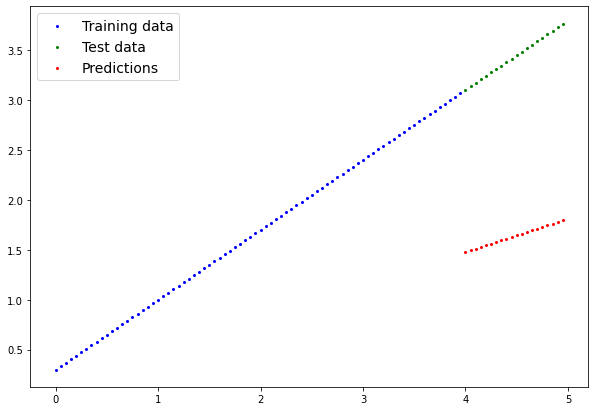

In [ ]:
plot_predictions(predictions=y_preds)

## 3. Train model

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters.

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your model's predictions are is to use a loss function.

> **Note:** Loss function may also be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function.

Things we need to train the model:

- **Loss function:** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.
- **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (weights and biases) to improve the loss function.
  - Inside the optimizer you'll often have to set two parameters:
    - `params` : the model parameters you'd like to optimize, for example `params=model_0.parameters()`
    - `lr` : the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step (a small `lr` results in small change, a large `lr` results in large changes).

And specifically for PyTorch, we need:
- A training loop
- A testing loop

In [ ]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # One of the most important hyperparameters

**Q.** Which loss function and optimizer should I use?

**A.** This will be problem specific. But with experiance, you'll get an idea of what works and what doesn't with your particular problem set.

For example, for a regression problem (like ours), a loss function of `nn.L1Loss()` and an optimizer like `torch.optim.SGD()` will suffice.

But for a classification problem like classifying whether a photo is of a dog or cat, you'll likely want to use a loss function of `nn.BCELoss()` (binary cross entropy loss).

### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()` functions)
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the graidents of each of the parameters of our model with respect to the loss
5 Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss.

In [ ]:
torch.manual_seed(42)

# An epoch is one loop through the data...
epochs = 200

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

### Training
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradient

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropogation on the loss with repoect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will accumulate through the loop so... we have to zero them

  ### Testing
  model_0.eval() # turns off the training mode, turns off different settings in the model not needed for evaluation/testing (dropout/batch-norm)
  with torch.inference_mode(): # turns off gradient tracking & a couple more things behind the scenes
    # 1. Do the forward pass
    test_preds = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_preds, y_test)

  # Print out what's happenin
  if epoch%10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

  # Print out model state_dict()
print(model_0.state_dict())

Epoch: 0 | Loss: 0.888727068901062 | Test loss: 1.6986198425292969
Epoch: 10 | Loss: 0.39866453409194946 | Test loss: 0.714807391166687
Epoch: 20 | Loss: 0.01886375993490219 | Test loss: 0.05000125244259834
Epoch: 30 | Loss: 0.022329604253172874 | Test loss: 0.04802744463086128
Epoch: 40 | Loss: 0.022329604253172874 | Test loss: 0.04802744463086128
Epoch: 50 | Loss: 0.022329604253172874 | Test loss: 0.04802744463086128
Epoch: 60 | Loss: 0.022329604253172874 | Test loss: 0.04802744463086128
Epoch: 70 | Loss: 0.022329604253172874 | Test loss: 0.04802744463086128
Epoch: 80 | Loss: 0.022329604253172874 | Test loss: 0.04802744463086128
Epoch: 90 | Loss: 0.022329604253172874 | Test loss: 0.04802744463086128
Epoch: 100 | Loss: 0.022329604253172874 | Test loss: 0.04802744463086128
Epoch: 110 | Loss: 0.022329604253172874 | Test loss: 0.04802744463086128
Epoch: 120 | Loss: 0.022329604253172874 | Test loss: 0.04802744463086128
Epoch: 130 | Loss: 0.022329604253172874 | Test loss: 0.048027444630861

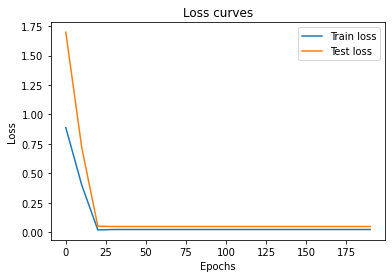

In [ ]:
# Plot the loss curves
import numpy as np

plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).numpy()), label="Test loss")
plt.title("Loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

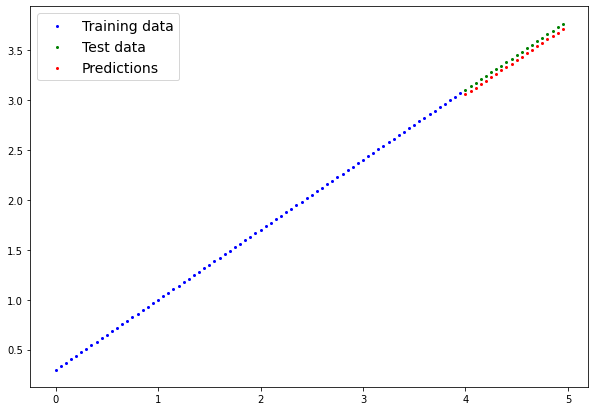

In [ ]:
with torch.inference_mode():
  y_preds = model_0(X_test)

plot_predictions(predictions=y_preds)

## Saving a model in PyTorch

There are three man methods you should about for saving and loading models in PyTorch.
1. `torch.save()` - allows you save a PyTorch object using pickle format
1. `torch.load()` - allows you to load a saved PyTorch object
1. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary

In [ ]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the state_dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


## Loading a PyTorch model

Since we saved our model's `state_dict()` rather than the entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that.

In [ ]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegression()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  y_preds = loaded_model_0(X_test)

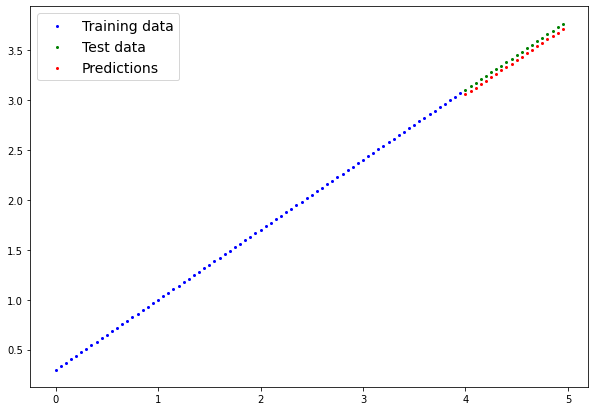

In [ ]:
# Compare loaded model preds
plot_predictions(predictions=y_preds);

## Putting it all together

Let's go back through the steps above and see it all in one place.

In [1]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

# Check PyTorch version
torch.__version__

'1.13.1+cu116'

Create device agnostic code.

For potentially faster computing;

In [2]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


### Data

In [11]:
# Create some data using the linear regression data using weights and bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 2
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, erros will pop-up
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [12]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")  
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Test data")  
  
  # Are there predictions
  if predictions is not None:
    # Plot the predictions
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

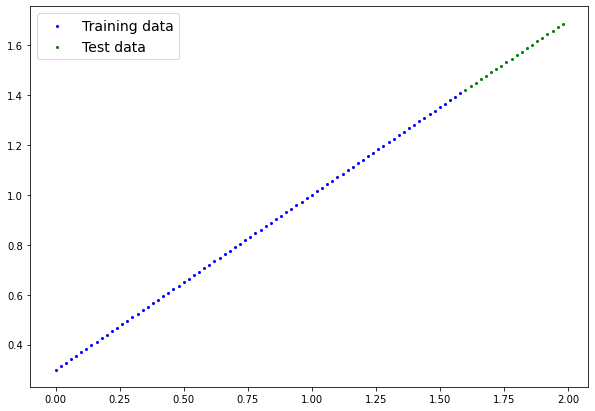

In [13]:
# Split the data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
plot_predictions();

### Building a PyTorch linear model

In [14]:
# Linear model
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()

    # Use nn.Linear() for creating model parameters
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1) # Applies y = w * x + b formula
    
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [15]:
# Set the model to use the target devide
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

### Training

For training we need:
* Loss function
- Optimizer
- Training loop
- Testing loop

In [17]:
# Setup loss function
loss_fn = nn.L1Loss()

# Setup our optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [19]:
# Setup training loo
torch.manual_seed(42)

epochs = 200

# Put data on the target device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for _ in range(epochs):
  model_1.train()

  # 1. Forward pass
  y_pred = model_1(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Back prop
  loss.backward()

  # 5. gradient descent
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  # Print out what's happening
  if _ % 10 == 0:
    print(f"Epoch: {_} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.5809932947158813 | Test loss: 0.6213908791542053
Epoch: 10 | Loss: 0.4185834527015686 | Test loss: 0.37998098134994507
Epoch: 20 | Loss: 0.2561735510826111 | Test loss: 0.1385711133480072
Epoch: 30 | Loss: 0.10299072414636612 | Test loss: 0.08629216253757477
Epoch: 40 | Loss: 0.07775498926639557 | Test loss: 0.13390929996967316
Epoch: 50 | Loss: 0.06794779002666473 | Test loss: 0.12994453310966492
Epoch: 60 | Loss: 0.05881597846746445 | Test loss: 0.11492715030908585
Epoch: 70 | Loss: 0.049724116921424866 | Test loss: 0.09719113260507584
Epoch: 80 | Loss: 0.04063038155436516 | Test loss: 0.07877559959888458
Epoch: 90 | Loss: 0.03153926506638527 | Test loss: 0.061039578169584274
Epoch: 100 | Loss: 0.022444790229201317 | Test loss: 0.042624033987522125
Epoch: 110 | Loss: 0.013354110531508923 | Test loss: 0.02488803304731846
Epoch: 120 | Loss: 0.004259181674569845 | Test loss: 0.006472515873610973
Epoch: 130 | Loss: 0.0025801663286983967 | Test loss: 0.01860066130757332

In [20]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6970]])),
             ('linear_layer.bias', tensor([0.2998]))])

### Making and evaluating predictions

In [21]:
# Turn the model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)

y_preds

tensor([[1.4150],
        [1.4290],
        [1.4429],
        [1.4568],
        [1.4708],
        [1.4847],
        [1.4987],
        [1.5126],
        [1.5265],
        [1.5405],
        [1.5544],
        [1.5684],
        [1.5823],
        [1.5963],
        [1.6102],
        [1.6241],
        [1.6381],
        [1.6520],
        [1.6660],
        [1.6799]])

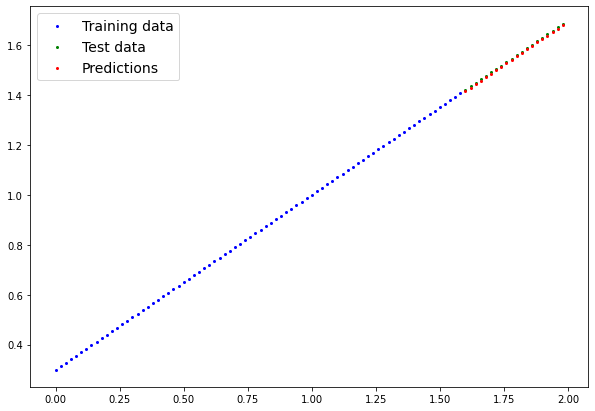

In [22]:
# Check out our model predictions visually
plot_predictions(predictions=y_preds.cpu())

### Saving and loading the trained model

In [24]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytroch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytroch_workflow_model_1.pth


In [25]:
# Load a model
loaded_model_1 = LinearRegressionModelV2()

# Load the params
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the target model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [26]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])